In [1]:
import torch
import pandas as pd

In [2]:
import sys
sys.path.append("C:\\Users\\rochakd\\Desktop\\daily-project\\HC18US")

In [3]:
from settings import configure_device,set_deterministics
from config import DEVICE,SEED

In [4]:
device = configure_device(DEVICE)
set_deterministics(SEED)
device

<>:48: SyntaxWarning: invalid escape sequence '\D'
<>:49: SyntaxWarning: invalid escape sequence '\D'
<>:48: SyntaxWarning: invalid escape sequence '\D'
<>:49: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1179013226.py:48: SyntaxWarning: invalid escape sequence '\D'
  image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"  # Replace with your image file
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1179013226.py:49: SyntaxWarning: invalid escape sequence '\D'
  mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"        # Replace with your annotation mask file


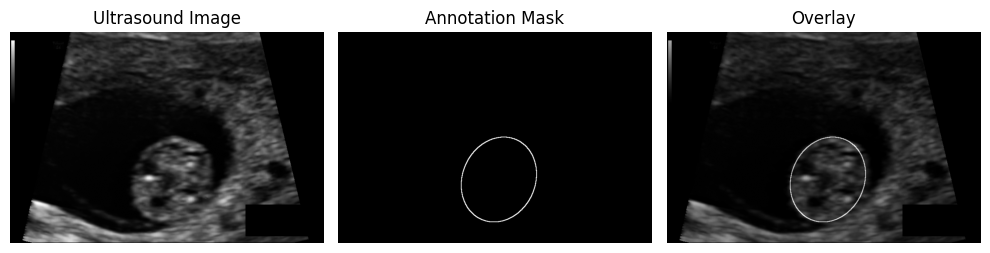

In [5]:
# reading one image and it corresponding mask.abs
import matplotlib.pyplot as plt
import cv2
import numpy as np

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def load_mask(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return mask

def overlay_mask(image, mask, alpha=0.5):
    color_mask = np.zeros_like(image, dtype=np.uint8)
    color_mask[mask > 0] = 255  # Convert mask to binary and apply color
    overlay = cv2.addWeighted(image, 1 - alpha, color_mask, alpha, 0)
    return overlay

# Visualization
def visualize_image_and_mask(image_path, mask_path):
    image = load_image(image_path)
    mask = load_mask(mask_path)

    overlay = overlay_mask(image, mask)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Ultrasound Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Annotation Mask")
    plt.imshow(mask, cmap='grey')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(overlay, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"  # Replace with your image file
mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"        # Replace with your annotation mask file
visualize_image_and_mask(image_path, mask_path)

In [6]:
#Read the circumference of the corresponding file from dataframe
csv_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set_pixel_size_and_HC.csv"
df = pd.read_csv(csv_path)

df.head(1)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\3852834320.py:2: SyntaxWarning: invalid escape sequence '\D'
  csv_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set_pixel_size_and_HC.csv"


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.3


In [7]:
pixel_size_value = df.loc[df['filename'] == "000_HC.png", 'pixel size(mm)'].values[0]
print(pixel_size_value)

0.0691358041432


In [8]:
f"{df.iloc[1,0].split(".")[0]}_Annonation.{df.iloc[1,0].split(".")[1]}"

'001_HC_Annonation.png'

In [9]:
df.iloc[2,0].split(".")[0]

'002_HC'

(540, 800, 3)
(540, 800, 3)


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\3664010696.py:3: SyntaxWarning: invalid escape sequence '\D'
  image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\3664010696.py:4: SyntaxWarning: invalid escape sequence '\D'
  mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"


(np.float64(-0.5), np.float64(799.5), np.float64(539.5), np.float64(-0.5))

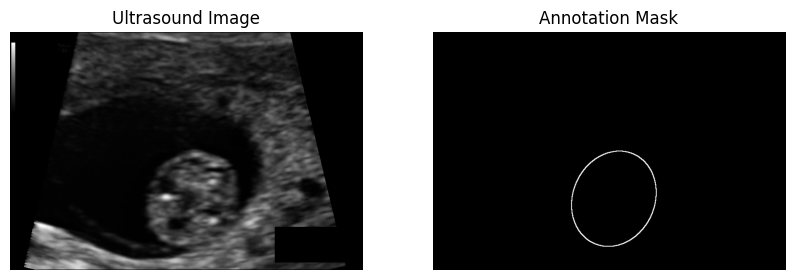

In [19]:
#test shape of image

image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png" 
mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"  

img_= cv2.imread(image_path)
mask_path = cv2.imread(mask_path)

print(img_.shape)
print(mask_path.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Ultrasound Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Annotation Mask")
plt.imshow(mask, cmap='grey')
plt.axis('off')


In [24]:
image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png" 
mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"  

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) 

print(image.shape)
print(mask.shape)

image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) / 255.0 
mask = torch.tensor(mask, dtype=torch.long)

print(image.shape)
print(mask.shape)


(540, 800)
(540, 800)
torch.Size([1, 540, 800])
torch.Size([540, 800])


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1441544198.py:1: SyntaxWarning: invalid escape sequence '\D'
  image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1441544198.py:2: SyntaxWarning: invalid escape sequence '\D'
  mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"


In [1]:
import os
import cv2
import torch
from collections import Counter

# Define the directory containing images
image_dir = "C:\\Users\\rochakd\\Desktop\\daily-project\\HC18US\\src\\training_set"

# Dictionary to store unique shapes
shape_counts = Counter()

# Iterate through all image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Filter image files
        image_path = os.path.join(image_dir, filename)
        
        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is not None:
            shape_counts[image.shape] += 1  # Store shape count

# Print unique image shapes and their frequencies
print("Unique Image Shapes in Directory:")
for shape, count in shape_counts.items():
    print(f"Shape: {shape}, Count: {count}")


Unique Image Shapes in Directory:
Shape: (540, 800), Count: 1950
Shape: (542, 786), Count: 2
Shape: (542, 782), Count: 2
Shape: (544, 794), Count: 2
Shape: (541, 738), Count: 2
Shape: (544, 780), Count: 2
Shape: (541, 783), Count: 2
Shape: (543, 783), Count: 2
Shape: (541, 797), Count: 2
Shape: (539, 790), Count: 2
Shape: (542, 800), Count: 10
Shape: (563, 799), Count: 2
Shape: (539, 780), Count: 2
Shape: (543, 794), Count: 2
Shape: (545, 788), Count: 2
Shape: (541, 798), Count: 2
Shape: (540, 789), Count: 2
Shape: (542, 796), Count: 2
Shape: (545, 789), Count: 2
Shape: (544, 796), Count: 2
Shape: (544, 791), Count: 2


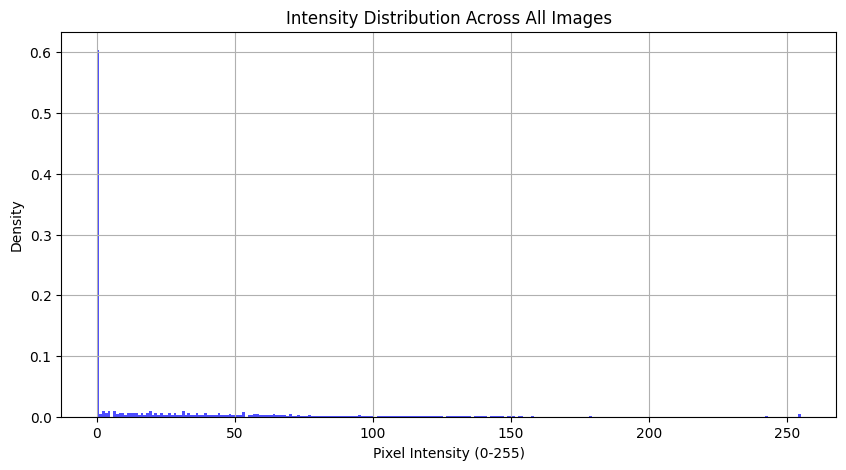

In [3]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define the directory containing images
image_dir = "C:\\Users\\rochakd\\Desktop\\daily-project\\HC18US\\src\\training_set"


# Check if directory exists
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Directory {image_dir} not found!")

# List to store intensity values
intensity_values = []

# Iterate through all image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Filter valid image files
        image_path = os.path.join(image_dir, filename)
        
        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is not None:
            intensity_values.extend(image.flatten())  # Store pixel intensities

# Convert to NumPy array for processing
intensity_values = np.array(intensity_values)

# Plot the intensity distribution histogram
plt.figure(figsize=(10, 5))
plt.hist(intensity_values, bins=256, range=(0, 255), color='blue', alpha=0.7, density=True)
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Density")
plt.title("Intensity Distribution Across All Images")
plt.grid(True)
plt.show()


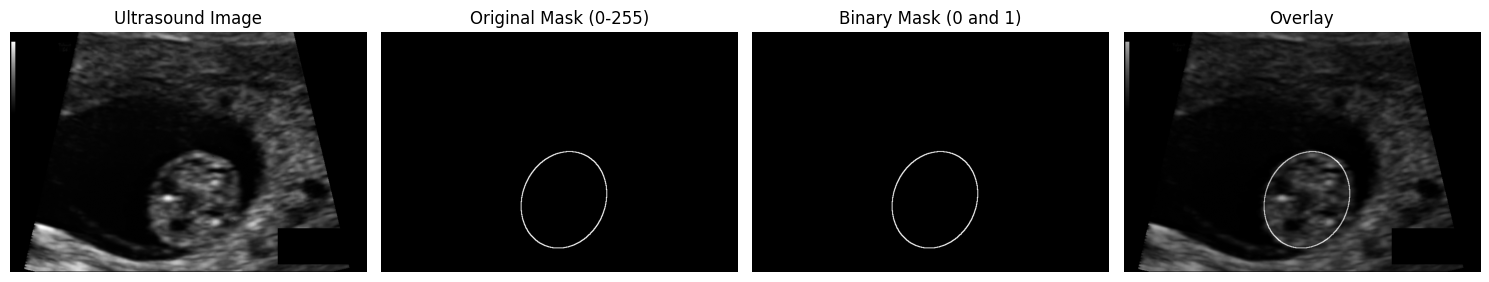

Binary Mask Sample Values (first 5x5 block):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def load_mask(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return mask

def overlay_mask(image, mask, alpha=0.5):
    color_mask = np.zeros_like(image, dtype=np.uint8)
    color_mask[mask > 0] = 255  # Convert mask to binary and apply color
    overlay = cv2.addWeighted(image, 1 - alpha, color_mask, alpha, 0)
    return overlay

def preprocess_mask(mask):
    # Convert mask from 0-255 to binary 0 and 1
    binary_mask = (mask > 0).astype(np.uint8)  # Threshold at 0; adjust if needed (e.g., == 255)
    return binary_mask

# Visualization with binary mask
def visualize_image_and_mask(image_path, mask_path):
    image = load_image(image_path)
    mask = load_mask(mask_path)
    binary_mask = preprocess_mask(mask)  # Preprocess to binary

    overlay = overlay_mask(image, mask)
    
    # Plot
    plt.figure(figsize=(15, 5))  # Increased figure size to accommodate 4 subplots
    
    plt.subplot(1, 4, 1)
    plt.title("Ultrasound Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.title("Original Mask (0-255)")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.title("Binary Mask (0 and 1)")
    plt.imshow(binary_mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.title("Overlay")
    plt.imshow(overlay, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print some values from the binary mask to confirm
    print("Binary Mask Sample Values (first 5x5 block):")
    print(binary_mask[:5, :5])

# Example usage
image_path = "/workspace/HC18US/src/training_set/000_HC.png"  # Replace with your image file
mask_path = "/workspace/HC18US/src/training_set/000_HC_Annotation.png"  # Replace with your annotation mask file
visualize_image_and_mask(image_path, mask_path)

In [1]:
!pip install pillow imageio


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
import os
import imageio.v2 as imageio
from PIL import Image

def create_animation(image_dir, output_gif="animation.gif", duration=10):
    """
    Create an animation from all images in a directory.

    :param image_dir: Path to the directory containing images.
    :param output_gif: Name of the output animation file.
    :param duration: Time per frame in milliseconds (default: 100ms).
    """
    images = []
    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')  # Supported formats

    # Get all image files in the directory
    image_files = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(valid_extensions)])

    if not image_files:
        print("No images found in the directory!")
        return

    # Load images
    for file in image_files:
        img_path = os.path.join(image_dir, file)
        img = Image.open(img_path).convert("RGBA")  # Ensure consistent mode
        images.append(img)

    # Save animation
    images[0].save(output_gif, save_all=True, append_images=images[1:], duration=duration, loop=0)
    print(f"Animation saved as {output_gif}")

# Usage example
create_animation("/workspace/HC18US/predicted_mask")


Animation saved as animation.gif
